In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [2]:
data = "../data/data1.xlsx"
data = pd.read_excel(data)
data

,t (s),V (V),Verr (V)
0,0.000,0.16,0.02
1,0.004,0.16,0.02
2,0.008,0.14,0.02
3,0.012,0.16,0.02
4,0.016,0.14,0.02
...,...,...,...
1915,7.660,0.14,0.02
1916,7.664,0.16,0.02
1917,7.668,0.16,0.02
1918,7.672,0.16,0.02


In [3]:
X = data['t (s)']
#Xerr = data['error Corriente A)']

Y = data['V (V)']
Yerr = data['Verr (V)']

#w = 1/(Yerr**2)

Y

0       0.16
1       0.16
2       0.14
3       0.16
4       0.14
        ... 
1915    0.14
1916    0.16
1917    0.16
1918    0.16
1919    0.16
Name: V (V), Length: 1920, dtype: float64

In [4]:
Y = Y - 0.16

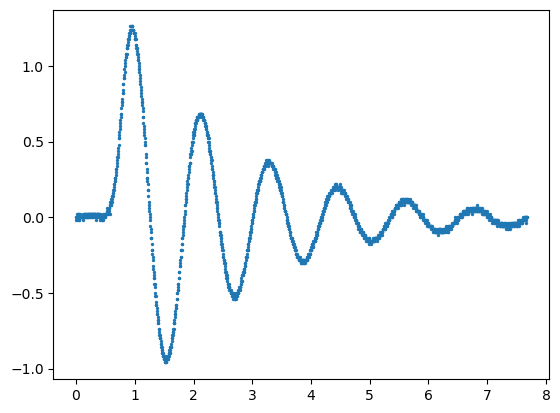

In [5]:
plt.scatter(X, Y, s=2)

In [6]:
N = 237
dt = X[1]-X[0]

X = X.iloc[N:]
Y = Y.iloc[N:]
Yerr = Yerr.iloc[N:]

X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)
Yerr = Yerr.reset_index(drop=True)

X = X - N*dt

X

0      -1.110223e-16
1       4.000000e-03
2       8.000000e-03
3       1.200000e-02
4       1.600000e-02
            ...     
1678    6.712000e+00
1679    6.716000e+00
1680    6.720000e+00
1681    6.724000e+00
1682    6.728000e+00
Name: t (s), Length: 1683, dtype: float64

In [7]:
Y

0       1.26
1       1.26
2       1.24
3       1.26
4       1.24
        ... 
1678   -0.02
1679    0.00
1680    0.00
1681    0.00
1682    0.00
Name: V (V), Length: 1683, dtype: float64

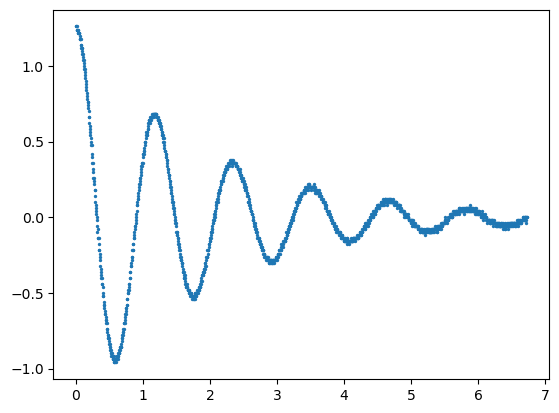

In [8]:
plt.scatter(X, Y, s=2)

In [9]:
V0 = Y[0]

def fit(X, gamma, omega, delta, C):
    return V0*np.exp(-gamma*X/2)*np.cos(omega*X + delta) + C

popt, pcov = curve_fit( fit, X, Y, absolute_sigma=True, maxfev = 10000 )

In [10]:
gamma = popt[0]
omega = popt[1]
delta = popt[2]
C = popt[3]

gammaerr = np.sqrt(pcov[0,0])
omegaerr = np.sqrt(pcov[1,1])

print(gamma)
print(omega)

print(gammaerr)
print(omegaerr)

1.0242129620336369
5.394289771729549
0.10585097625693975
0.07765785894214314


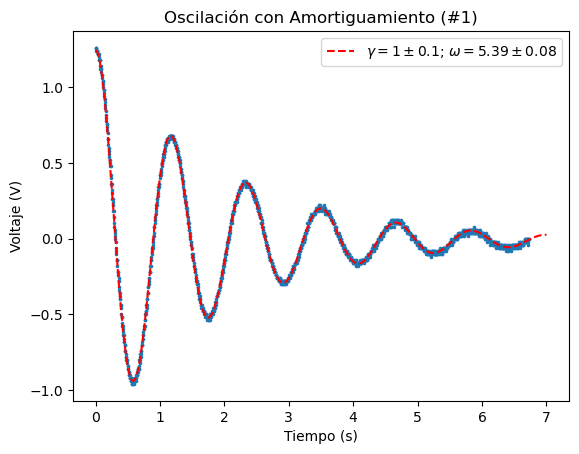

In [11]:
x = np.linspace(0, 7, 70001)
y = fit(x, gamma, omega, delta, C)

plt.plot(x, y, color="red", linestyle="--", label=r"$\gamma = 1\pm 0.1$" + "; " + r"$\omega = 5.39\pm 0.08$")
plt.scatter(X, Y, s=2.5)

plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.title("Oscilación con Amortiguamiento (#1)")

plt.legend(loc="upper right")

plt.savefig("act4_img1")

In [12]:
w0 = np.sqrt(omega**2 + (gamma/2)**2)
w0err = np.sqrt( ( 0.5*(omega**2 + (gamma/2)**2)**(-1/2)*(2*omega*omegaerr) )**2 + ( 0.5*(omega**2 + (gamma/2)**2)**(-1/2)*(2*gamma*gammaerr) )**2 )

Q = w0/gamma
Qerr = np.sqrt( (w0err/gamma)**2 + (gammaerr*w0/(gamma**2))**2 )

print(Q)
print(Qerr)

5.290446266398149
0.5522915648553338


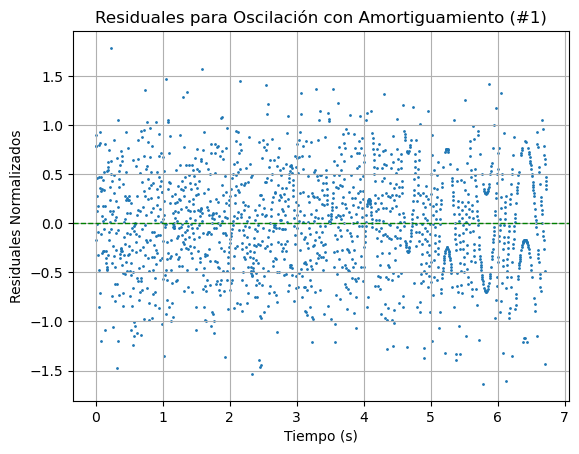

In [13]:
model = fit(X, gamma, omega, delta, C)
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res, s=1)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('Tiempo (s)')
ax2.set_title('Residuales para Oscilación con Amortiguamiento (#1)')
ax2.grid()

plt.savefig('act4_img1_res.png', format='png')